<br></br>
# **Project4 | word2vec**
<br></br>
## **1 데이터 전처리**

In [1]:
# 살인의 추억 텍스트 불러오기
filename = '../data/movie_memories_of_murder_2003.txt'
with open(filename, 'r') as f:
    texts = f.read()
texts[:500]

'박두만\n서태윤\n조용구\n권귀옥\n구희봉\n신동철\n백광호20대 초반. 정박아\n조병순30대 후반. 변태성향\n박해일20대 초반. 공장 노동자. ‘유력한 용의자’.\n선본 남자, 동네 양아치들... 등등\n30대 초반의 전직 간호조무사, 마을 ‘야매주사’ 여인.\n안송여중 1학년 학생\n소현의 단짝 친구\n박보희, 이향숙, 독고현순, 박명자, 안미선.\n화면 가득 한 남자 아이의 얼굴이 보여진다.\n쏟아지는 햇살 아래, 맑은 눈빛의 아이는 카메라 정면을 응시하고 있다.\n아이는 코스모스 위에 앉아있는 잠자리를 향해 살며시 손을 뻗는다.\n휙~ 잠자리가 날아가 버리면 ... 끝없이 펼쳐진 가을 논과 푸른 하늘이 보인다.\n어렴풋이 들려오는 기계소리에 아이가 고개를 돌리면, 저 멀리 경운기 한 대가 오는 것이 보인다. 점점 커지는 소리와 함께, 경운기를 운전하는 노인네와 뒷칸에 \n올라 탄 한 남자의 모습이 보인다.\n스포츠 머리에 건달같은 인상을 풍기는 30대 남자 ... 형사 박두만이다.\n경운기를 세운 노인은 소리를'

In [2]:
from txtutil import txtnoun
skips = {'두만':'박두만', '태윤':'서태윤', '용구':'조용구', '귀옥':'권귀옥', 
         '희봉':'구희봉', '동철':'신동철', '광호':'백광호', '병순':'조병순', 
         '해일':'박해일', '광호의':'백광호', '백광호의':'백광호'}
%time texts  = txtnoun(filename, skip=skips, tags=['Noun'])
texts[:500]

CPU times: user 11.4 s, sys: 150 ms, total: 11.5 s
Wall time: 5.45 s


'박두만\n 서태윤\n 조용구\n 권귀옥\n 구희봉\n 신동철\n 백광호 초반 정박\n 조병순대 후반 변태성향\n 박해일 초반 공장 노동자 유력 용의자\n 선본 남자 동네 양아치 등등\n 초반 전직 간호조무사 마을 야매주사 여인\n 안송여중 학년 학생\n 소현 단짝 친구\n 박보희 이향숙 독고현순 박명자 안미선\n 화면 가득 남자 아이 얼굴\n 햇살 아래 맑은 눈빛 아이 카메라 정면 응시\n 아이 코스모스 잠자리\n 잠자리 가을 푸른 하늘\n 기계소리 아이 고개 멀리 경운기 대가 점점 소리 경운기 운전 노인 뒷칸\n 남자 모습\n 스포츠 머리 건달 인상 풍기 남자 형사 박두만\n 경운기 세운 노인 소리 아이 아이 아랑곳 노인 박두 안내 농수로 배수관\n 화면 등장 여자 시체\n 배수관 어두운 구멍 나체 여자 시신\n 미니 후레쉬 주머니 여자 얼굴 박두만\n 여자 순간 안광이 번뜩\n 위로 파리 개미 토사물 거기 핏자국 새소리 햇살아래 하늘거리 코스모스\n 무덤덤 여자 박보희 시체 뭔가 생경 느낌\n 언제 주위 동네 아이\n 녀석 여자 '

In [3]:
# 명사 Token 작업된 자료를 ssResport.txt 로 저장 
texts_file = '../data/mom_noun_script.txt'
with open(texts_file, 'w', encoding='utf-8') as file:
    file.write(texts)

In [4]:
# ! cat ./data/ssResport.txt | head -n 10

<br></br>
## **2 Word 2 vec 객체 만들기**
gensim

In [5]:
# ! pip3 install gensim

In [6]:
%%time
texts_file = '../data/mom_noun_script.txt'

from gensim.models import word2vec
data  = word2vec.LineSentence(texts_file)
model = word2vec.Word2Vec(data, size=30, window=2, min_count=10, hs=1,
                          workers=4, iter=100, sg=1)
model.save("../data/mom_script.model")
print("model saved.")

model saved.
CPU times: user 3.14 s, sys: 101 ms, total: 3.24 s
Wall time: 3.17 s


<br></br>
## **3 저장된 모델 불러오기 및 확인**
gensim

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
%who

Interactive namespace is empty.


In [9]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('../data/mom_script.model')
len(model.wv.vocab.keys())

149

In [10]:
list(model.wv.index2word)

['서태윤',
 '얼굴',
 '박두만',
 '여자',
 '백광호',
 '조용구',
 '박해일',
 '반장',
 '계속',
 '순간',
 '모습',
 '소현',
 '하나',
 '소리',
 '시작',
 '범인',
 '남자',
 '사람',
 '표정',
 '형사',
 '다시',
 '뭔가',
 '권귀옥',
 '지금',
 '고개',
 '잠시',
 '아이',
 '보고',
 '눈빛',
 '설영',
 '여기',
 '얘기',
 '동네',
 '화면',
 '시체',
 '시선',
 '사진',
 '한번',
 '서류',
 '위로',
 '책상',
 '새끼',
 '그림자',
 '멀리',
 '점점',
 '머리',
 '갑자기',
 '이향숙',
 '문득',
 '사건',
 '발자국',
 '자기',
 '가운데',
 '당신',
 '아래',
 '박두',
 '괴남자',
 '저기',
 '스타킹',
 '그냥',
 '목소리',
 '불빛',
 '사무실',
 '진짜',
 '모두',
 '운동화',
 '우리',
 '사이',
 '용의자',
 '현장',
 '조그만',
 '다른',
 '생각',
 '전경',
 '기차',
 '마주',
 '취조실',
 '바로',
 '발견',
 '임마',
 '잠깐',
 '박명자',
 '거기',
 '음악',
 '부분',
 '시점',
 '간다',
 '그거',
 '끄덕',
 '자리',
 '버럭',
 '우산',
 '변소',
 '어디',
 '정말',
 '잔뜩',
 '다리',
 '그대로',
 '똑바로',
 '서서히',
 '가득',
 '인상',
 '후레쉬',
 '너머',
 '순경',
 '저녁',
 '경찰',
 '훈련',
 '언덕',
 '구희봉',
 '카메라',
 '주위',
 '브래지어',
 '분위기',
 '아저씨',
 '구석',
 '피해자',
 '그게',
 '팬티',
 '어리둥절',
 '누군가',
 '라디오',
 '짜증',
 '의경',
 '방송',
 '빗줄기',
 '어둠속',
 '인부',
 '조병순',
 '유전자',
 '바람',
 '서로',
 '주변',
 '참깨밭',
 '근처',
 '듯이',
 '가방',
 

<br></br>
## **4 Word2Vec 모델 내용 확인**
gensim

In [11]:
model.wv.most_similar(positive=['범인'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('우리', 0.7900596857070923),
 ('거기', 0.6960532665252686),
 ('그냥', 0.6365386843681335),
 ('그거', 0.6006745100021362),
 ('변소', 0.5372765064239502),
 ('여기', 0.5345128774642944),
 ('얘기', 0.529381513595581),
 ('우산', 0.5198854207992554),
 ('한번', 0.5091301202774048),
 ('당신', 0.49215778708457947)]

In [12]:
model.wv.most_similar(negative=['범인'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('어리둥절', 0.20564770698547363),
 ('괴남자', 0.14735087752342224),
 ('인부', 0.12758076190948486),
 ('끄덕', 0.0938890278339386),
 ('형사', 0.08171150088310242),
 ('박해일', 0.05804525688290596),
 ('시선', 0.054364465177059174),
 ('멀리', 0.05124831199645996),
 ('똑바로', 0.040952324867248535),
 ('조심스레', 0.04004107415676117)]

In [13]:
model.wv.most_similar(positive=['피해자'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('이향숙', 0.6904958486557007),
 ('참깨밭', 0.6747854948043823),
 ('의경', 0.633386492729187),
 ('발견', 0.6128952503204346),
 ('새끼', 0.6061909198760986),
 ('순경', 0.567891538143158),
 ('정말', 0.5417141914367676),
 ('스타킹', 0.5283291935920715),
 ('조그만', 0.5013279914855957),
 ('하나', 0.4856257438659668)]

In [14]:
model.wv.most_similar(negative=['피해자'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('너머', 0.23135656118392944),
 ('총구', 0.19893616437911987),
 ('보고', 0.15661761164665222),
 ('기차', 0.13491174578666687),
 ('라디오', 0.13442900776863098),
 ('그대로', 0.13437345623970032),
 ('짜증', 0.12772715091705322),
 ('듯이', 0.08391261845827103),
 ('책상', 0.0827057808637619),
 ('빗물', 0.06605809181928635)]

In [15]:
model.wv.most_similar(positive=['박두만'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('서태윤', 0.6975997686386108),
 ('백광호', 0.6874744892120361),
 ('뭔가', 0.6816097497940063),
 ('조용구', 0.6327073574066162),
 ('사진', 0.6286661624908447),
 ('휴지', 0.6270521879196167),
 ('표정', 0.6174828410148621),
 ('얼굴', 0.6163499355316162),
 ('고개', 0.6044750213623047),
 ('어리둥절', 0.5962847471237183)]

In [16]:
model.wv.most_similar(positive=['서태윤'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('박두만', 0.6975998282432556),
 ('박해일', 0.6611736416816711),
 ('서서히', 0.6190056800842285),
 ('권귀옥', 0.6106432676315308),
 ('반장', 0.5893822908401489),
 ('잠시', 0.584406316280365),
 ('뭔가', 0.5732418298721313),
 ('다시', 0.5702092051506042),
 ('취조실', 0.5583451986312866),
 ('보고', 0.5568782687187195)]

In [17]:
model.wv.most_similar(positive=['조용구'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('보고', 0.7067176699638367),
 ('구희봉', 0.6660506725311279),
 ('자리', 0.6340445280075073),
 ('박두만', 0.6327073574066162),
 ('짜증', 0.6230899095535278),
 ('백광호', 0.6188753843307495),
 ('사무실', 0.6172367930412292),
 ('갑자기', 0.5982691049575806),
 ('모두', 0.5936163663864136),
 ('잠시', 0.5735465884208679)]

In [18]:
model.wv.most_similar(positive=['박두만','서태윤'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('뭔가', 0.68101966381073),
 ('박해일', 0.6716170907020569),
 ('백광호', 0.6408335566520691),
 ('조용구', 0.6297107934951782),
 ('반장', 0.629507303237915),
 ('고개', 0.6279381513595581),
 ('휴지', 0.6262889504432678),
 ('잠시', 0.620336651802063),
 ('얼굴', 0.618887186050415),
 ('듯이', 0.6011371612548828)]

In [19]:
model.wv.most_similar(positive=['박두만','서태윤'],
                      negative=['피해자'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('박해일', 0.6344929933547974),
 ('보고', 0.6293025016784668),
 ('총구', 0.6223453283309937),
 ('듯이', 0.6176120042800903),
 ('휴지', 0.5986297726631165),
 ('반장', 0.5743878483772278),
 ('그대로', 0.5628871917724609),
 ('잠시', 0.5429807305335999),
 ('다시', 0.5402548313140869),
 ('짜증', 0.5381396412849426)]

In [20]:
model.wv.most_similar(positive=['박두만','서태윤'],
                      negative=['박해일'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('자리', 0.6815916895866394),
 ('반장', 0.6703791618347168),
 ('뭔가', 0.6372842788696289),
 ('조용구', 0.6234527826309204),
 ('코피', 0.6135426759719849),
 ('표정', 0.6081563830375671),
 ('구석', 0.6037955284118652),
 ('짜증', 0.599467396736145),
 ('휴지', 0.5962086915969849),
 ('인부', 0.5915132761001587)]

In [21]:
model.wv.most_similar(positive=['박두만','서태윤'],
                      negative=['범인'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('박해일', 0.6704642176628113),
 ('어리둥절', 0.6535400748252869),
 ('잠시', 0.5683966279029846),
 ('순간', 0.5675263404846191),
 ('취조실', 0.5628403425216675),
 ('고개', 0.5516542792320251),
 ('조용구', 0.5489233732223511),
 ('괴남자', 0.5390815734863281),
 ('백광호', 0.5236437320709229),
 ('얼굴', 0.521577000617981)]

<br></br>
## **5 Visulaization**
gensim

In [22]:
list(model.wv.vocab.keys())[:10]

['박두만', '서태윤', '조용구', '권귀옥', '구희봉', '백광호', '박해일', '용의자', '남자', '동네']

In [23]:
# model.wv.vocab : { word: object of numeric vector }
vocab  = list(model.wv.vocab)
X      = model[vocab]
X.shape

/home/markbaum/Python/nltk/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(149, 30)

In [24]:
%%time
from sklearn.manifold import TSNE
tsne   = TSNE(n_components= 2)
X_tsne = tsne.fit_transform(X)

CPU times: user 1.94 s, sys: 386 ms, total: 2.33 s
Wall time: 2.11 s


In [25]:
import pandas as pd
df = pd.DataFrame(X_tsne, 
                  index = vocab, 
                  columns=['x', 'y'])
df.head()

,x,y
박두만,-0.407928,0.991980
서태윤,-0.813501,0.597934
조용구,-0.787828,1.725268
권귀옥,0.503881,0.165505
구희봉,-2.001381,3.504587


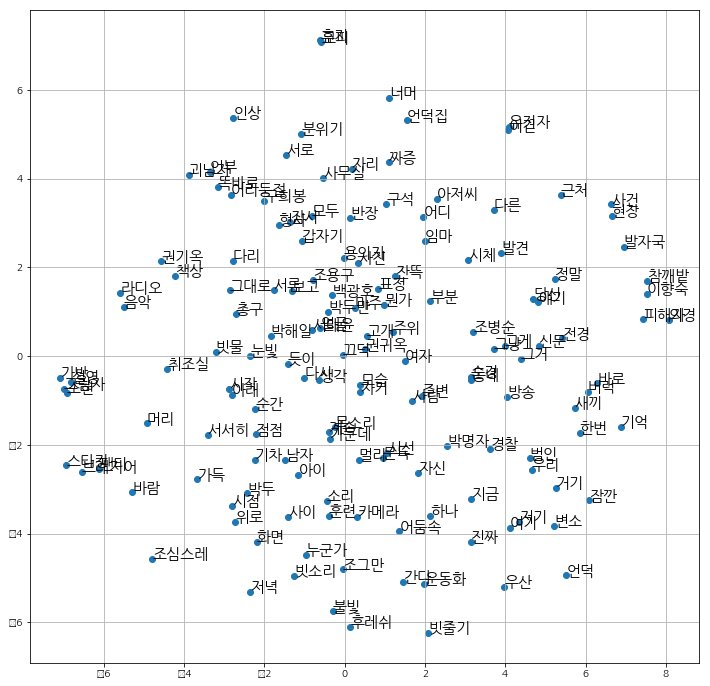

In [26]:
%matplotlib inline
from matplotlib import rc
rc('font', family=['NanumGothic','Malgun Gothic'])

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=15)
plt.grid(True)